In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ]) #(8,3)
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0]) #8,

In [11]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]]) #(3,8)
y_test = torch.LongTensor([2, 2, 2])

In [12]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,3) #입력 차원이 3, 3개의 클래스
  def forward(self, x):
    return self.linear(x)

In [13]:
model = SoftmaxClassifierModel()

In [25]:
#optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 0.1) #learning rate
#optimizer = optim.SGD(model.parameters(), lr = 1e5)
#optimizer = optim.SGD(model.parameters(), lr = 1e-10)

cost가 줄어들지 않으면 learning rate를 크게 늘려보자


In [20]:
def train(model, optimizer, x_train, y_train):
  num_epochs = 20
  for epoch in range(num_epochs):
    #hypothesis
    prediction = model(x_train)
    #cost
    cost = F.cross_entropy(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, num_epochs, cost.item()
        ))

In [18]:
def test(model, optimizer, x_test, y_test):
  prediction = model(x_test) #(m', 3)
  predicted_classes = prediction.max(1)[1] #max(axis = 1) 열을 없애야함 로우별로 가장 큰값들 남는거임
  correct_count = (predicted_classes == y_test).sum().item()
  cost = F.cross_entropy(prediction, y_test)

  print('Accuracy: {}% Cost: {:.6f}'.format(
      correct_count / len(y_test)*100, cost.item())
  )

In [26]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 291188.875000
Epoch    1/20 Cost: 291186.625000
Epoch    2/20 Cost: 291184.406250
Epoch    3/20 Cost: 291182.187500
Epoch    4/20 Cost: 291180.000000
Epoch    5/20 Cost: 291177.750000
Epoch    6/20 Cost: 291175.562500
Epoch    7/20 Cost: 291173.343750
Epoch    8/20 Cost: 291171.093750
Epoch    9/20 Cost: 291168.875000
Epoch   10/20 Cost: 291166.656250
Epoch   11/20 Cost: 291164.406250
Epoch   12/20 Cost: 291162.250000
Epoch   13/20 Cost: 291160.000000
Epoch   14/20 Cost: 291157.812500
Epoch   15/20 Cost: 291155.562500
Epoch   16/20 Cost: 291153.343750
Epoch   17/20 Cost: 291151.125000
Epoch   18/20 Cost: 291148.875000
Epoch   19/20 Cost: 291146.656250


In [22]:
test(model, optimizer, x_test, y_test)

Accuracy: 100.0% Cost: 0.303722


# overfitting 막기
train set에서 overfitting이되면 안된단말이지 그러면 test set에 굉장히 성능이 낮겠쥬? 그러면 validation set을 통해서 검증을 하고 나서 test set으로 넘어가면 훨씬 정확한 성능의 모델이 나올거임
1. validation loss와 train loss를 비교해서 둘다 낮은 지점의 epoch에서 stop!!
2. more data
3. less features
4. regularization

## Regualarization
- early stopping : validation loss가 더이상 낮아지지 않을 때 (위에 1번)
- reducing network size : 학습양을 줄일 수 있음
- weight decay : 파라미터 크기를 제한
- dropout 
- batch normalization 

dropout이랑 batch normalization이 많이 사용됨

# Data Preprocessing
데이터를 zero-center하고 정규화

In [27]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [28]:
mu = x_train.mean(dim = 0)

In [29]:
sigma = x_train.std(dim=0)

In [30]:
norm_x_Train = (x_train - mu)/sigma

In [31]:
print(norm_x_Train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [32]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [33]:
model= MultivariateLinearRegressionModel()

In [34]:
optimizer = optim.SGD(model.parameters(), lr = 1e-1)

In [35]:
def train(model, optimizer, x_train, y_train):
  num_epochs = 20
  for epoch in range(num_epochs):
    #hypothesis
    prediction = model(x_train)
    #cost
    cost = F.mse_loss(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, num_epochs, cost.item()
        ))

In [38]:
train(model, optimizer, x_train, y_train) 
#y_train 이 1개의 값이었지만
#만약 2차원의 벡터이고 첫번째 컬럼은 1000,999이고 두번째 컬럼의 값들은 0.1,0.2라면
#weight은 첫번째 컬럼의 값에 의해서 좌우될것임
#전처리를 통해서 두 컬럼의 값들을 맞추어주면 weight이 잘 최적화될것임

Epoch    0/20 Cost: 3990337.250000
Epoch    1/20 Cost: 77257250963456.000000
Epoch    2/20 Cost: 1495949992174542651392.000000
Epoch    3/20 Cost: 28966429321944459383385620480.000000
Epoch    4/20 Cost: 560883614996788438417673787407335424.000000
Epoch    5/20 Cost: inf
Epoch    6/20 Cost: inf
Epoch    7/20 Cost: inf
Epoch    8/20 Cost: inf
Epoch    9/20 Cost: inf
Epoch   10/20 Cost: inf
Epoch   11/20 Cost: inf
Epoch   12/20 Cost: nan
Epoch   13/20 Cost: nan
Epoch   14/20 Cost: nan
Epoch   15/20 Cost: nan
Epoch   16/20 Cost: nan
Epoch   17/20 Cost: nan
Epoch   18/20 Cost: nan
Epoch   19/20 Cost: nan


In [37]:
train(model, optimizer, norm_x_Train, y_train) #헐 데이터 전처리가 이렇게 중요한거였군!!!

Epoch    0/20 Cost: 29788.910156
Epoch    1/20 Cost: 18915.085938
Epoch    2/20 Cost: 12062.200195
Epoch    3/20 Cost: 7707.308594
Epoch    4/20 Cost: 4929.182617
Epoch    5/20 Cost: 3153.799072
Epoch    6/20 Cost: 2018.310913
Epoch    7/20 Cost: 1291.815674
Epoch    8/20 Cost: 826.917358
Epoch    9/20 Cost: 529.395569
Epoch   10/20 Cost: 338.981842
Epoch   11/20 Cost: 217.113770
Epoch   12/20 Cost: 139.113983
Epoch   13/20 Cost: 89.189285
Epoch   14/20 Cost: 57.233284
Epoch   15/20 Cost: 36.777184
Epoch   16/20 Cost: 23.681089
Epoch   17/20 Cost: 15.295601
Epoch   18/20 Cost: 9.925121
Epoch   19/20 Cost: 6.484325


# regularization

In [39]:
def train_with_reg(model, optimizer, x_train, y_train):
  num_epochs = 20
  for epoch in range(num_epochs):
    #hypothesis
    prediction = model(x_train)
    #cost
    cost = F.mse_loss(prediction, y_train)

    #l2norm
    l2_reg = 0
    for param in model.parameters():
      l2_reg += torch.norm(param)
    
    cost += l2_reg
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, num_epochs, cost.item()
        ))

In [40]:
model = MultivariateLinearRegressionModel()

In [41]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [43]:
train_with_reg(model, optimizer, norm_x_Train, y_train)

Epoch    0/20 Cost: 29720.759766
Epoch    1/20 Cost: 18882.529297
Epoch    2/20 Cost: 12110.525391
Epoch    3/20 Cost: 7805.382812
Epoch    4/20 Cost: 5058.509277
Epoch    5/20 Cost: 3302.955811
Epoch    6/20 Cost: 2180.110107
Epoch    7/20 Cost: 1461.691162
Epoch    8/20 Cost: 1001.958618
Epoch    9/20 Cost: 707.743408
Epoch   10/20 Cost: 519.446045
Epoch   11/20 Cost: 398.933014
Epoch   12/20 Cost: 321.801636
Epoch   13/20 Cost: 272.434021
Epoch   14/20 Cost: 240.835083
Epoch   15/20 Cost: 220.608551
Epoch   16/20 Cost: 207.660446
Epoch   17/20 Cost: 199.370667
Epoch   18/20 Cost: 194.062408
Epoch   19/20 Cost: 190.662491


# MNIST

In [49]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import random

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [50]:
training_epochs = 15
batch_size = 100

In [47]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

mnist_train = dsets.MNIST(root="MNIST_data/",
                          train=True,
                          transform = transforms.ToTensor(), #pytorch에 맞게 변형
                          download = True)
mnist_test = dsets.MNIST(root="MNIST_data/",
                          train=False,
                          transform = transforms.ToTensor(), #pytorch에 맞게 변형
                          download = True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


- epoch : all the training examples

  ex.6만장의 mnist 데이터
- batch size: training examples를 몇개로 잘라서 학습할 것인가?
- iteration : batch를 몇번 학습을 시켰는가???

1000개의 데이터 -> 500개의 배치사이즈이면 2번의 iteration이 일어나면 1번의 epoch 완료

In [51]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [52]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [53]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [55]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  
  for X,Y in data_loader:
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished')

Epoch: 0001 cost = 0.535701573
Epoch: 0002 cost = 0.359403193
Epoch: 0003 cost = 0.331129968
Epoch: 0004 cost = 0.316610843
Epoch: 0005 cost = 0.307287753
Epoch: 0006 cost = 0.300151169
Epoch: 0007 cost = 0.295128852
Epoch: 0008 cost = 0.290526152
Epoch: 0009 cost = 0.287431419
Epoch: 0010 cost = 0.284428835
Epoch: 0011 cost = 0.281726062
Epoch: 0012 cost = 0.279582143
Epoch: 0013 cost = 0.277621865
Epoch: 0014 cost = 0.275999963
Epoch: 0015 cost = 0.274319798
Learning Finished


In [56]:
with torch.no_grad(): #해당 범위에서는 gradient계산 없이
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.8833000063896179


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  7
Prediction:  7


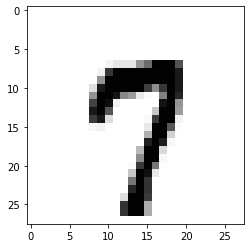

In [59]:
#visualization
import matplotlib.pyplot as plt
r = random.randint(0,len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
y_single_data = mnist_test.test_labels[r:r+1].to(device)

print('Label: ', y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())
plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

# Lab9 XOR

In [60]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)